In [2]:
!pip install TensorFlow
# pip install Keras
# pip install pillow
# pip install NumPy
# Pip install tqdm
# Pip install jupyterlab

^C


In [ ]:
%pip install Tensorflow

In [1]:
pip install tensorflow

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pillow

In [4]:
pip install NumPy

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\hq388yh\anaconda3\lib\site-packages
Requires: 
Required-by: astropy, autoviz, bkcharts, blis, bokeh, Bottleneck, contourpy, daal4py, datashader, datashape, dtale, feature-engine, gensim, h5py, holoviews, hvplot, imagecodecs, ImageHash, imageio, imbalanced-learn, jax, matplotlib, missingno, mkl-fft, mkl-random, name-matching, numba, numexpr, opt-einsum, pandas, patsy, phik, pyamg, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, spacy, statsmodels, sweetviz, tables, tensorboard, tensorflow-intel, thinc, tifffile, visions, wordcloud, xarray, xgboost, ydata-profiling
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip show tqdm

Name: tqdmNote: you may need to restart the kernel to use updated packages.

Version: 4.64.1
Summary: Fast, Extensible Progress Meter
Home-page: https://tqdm.github.io
Author: 
Author-email: 
License: MPLv2.0, MIT Licences
Location: c:\users\hq388yh\anaconda3\lib\site-packages
Requires: colorama
Required-by: anaconda-client, anaconda-project, conda, conda-build, name-matching, nltk, panel, spacy, sweetviz, ydata-profiling


In [8]:
pip show jupyterlab

Name: jupyterlab
Version: 3.5.2
Summary: JupyterLab computational environment
Home-page: https://jupyter.org
Note: you may need to restart the kernel to use updated packages.
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: 
Location: c:\users\hq388yh\anaconda3\lib\site-packages
Requires: ipython, jinja2, jupyter-core, jupyter-server, jupyterlab-server, nbclassic, notebook, packaging, tomli, tornado
Required-by: 


In [1]:
import numpy as np
from PIL import Image
import os
import string
from pickle import dump
from pickle import load
from keras.applications.xception import Xception #to get pre-trained model Xception
from keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer #for text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.layers import add
from keras.models import Model, load_model
from keras.layers import Input, Dense#Keras to build our CNN and LSTM
from keras.layers import LSTM, Embedding, Dropout
from tqdm import tqdm_notebook as tqdm #to check loop progress
tqdm().pandas()

C:\Users\HQ388YH\AppData\Local\Temp\ipykernel_13960\2600175968.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

In [2]:
# Load the document file into memory
def load_fp(filename):
    
  # Open file to read
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [3]:
# get all images with their captions
def img_capt(filename):
    file = open(filename, "r").read()
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [ caption ]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions

In [4]:
#Data cleaning function will convert all upper case alphabets to lowercase, removing punctuations and words containing numbers
def txt_clean(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):
            img_caption.replace("-"," ")
            descp = img_caption.split()
          #uppercase to lowercase
            descp = [wrd.lower() for wrd in descp]
          #remove punctuation from each token
            descp = [wrd.translate(table) for wrd in descp]
          #remove hanging 's and a
            descp = [wrd for wrd in descp if(len(wrd)>1)]
          #remove words containing numbers with them
            descp = [wrd for wrd in descp if(wrd.isalpha())]
          #converting back to string
            img_caption = ' '.join(descp)
            captions[img][i]= img_caption
    return captions

In [5]:
def txt_vocab(descriptions):
               
  # To build vocab of all unique words
    vocab = set()
    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]
    return vocab

In [6]:
#To save all descriptions in one file
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            
            lines.append(key + '|t' + desc )
            data = "\n".join(lines)
            file = open(filename,"w")
            file.write(data)
            file.close()

In [8]:
#to prepare our text data
filename = "Flickr8k.token.txt"

#loading the file that contains all data
#map them into descriptions dictionary 
descriptions = img_capt(filename)
print("Length of descriptions =" ,len(descriptions))

Length of descriptions = 8092


In [9]:
descriptions

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'T

In [10]:
#cleaning the descriptions
clean_descriptions = txt_clean(descriptions)

In [11]:
clean_descriptions

{'1000268201_693b08cb0e.jpg': ['child in pink dress is climbing up set of stairs in an entry way',
  'girl going into wooden building',
  'little girl climbing into wooden playhouse',
  'little girl climbing the stairs to her playhouse',
  'little girl in pink dress going into wooden cabin'],
 '1001773457_577c3a7d70.jpg': ['black dog and spotted dog are fighting',
  'black dog and tricolored dog playing with each other on the road',
  'black dog and white dog with brown spots are staring at each other in the street',
  'two dogs of different breeds looking at each other on the road',
  'two dogs on pavement moving toward each other'],
 '1002674143_1b742ab4b8.jpg': ['little girl covered in paint sits in front of painted rainbow with her hands in bowl',
  'little girl is sitting in front of large painted rainbow',
  'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it',
  'there is girl with pigtails sitting in front of rainbow painting',
  'young 

In [12]:
#to build vocabulary
vocabulary = txt_vocab(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))

Length of vocabulary =  8763


In [14]:
#saving all descriptions in one file
save_descriptions(clean_descriptions, "descriptions.txt")

In [15]:
def extract_features(directory):
    model = Xception( include_top=False, pooling='avg' )
    features = {}
    for pic in tqdm(os.listdir(directory)):
        file = directory + "/" + pic
        image = Image.open(file)
        image = image.resize((299,299))
        image = np.expand_dims(image, axis=0)
        #image = preprocess_input(image)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        features[image] = feature
    return features

In [16]:
model = Xception( include_top=False, pooling='avg' )
features = {}
for pic in tqdm(os.listdir('Flicker8k_Dataset')):
    file = 'Flicker8k_Dataset' + "/" + pic
    image = Image.open(file)
    image = image.resize((299,299))
    image = np.expand_dims(image, axis=0)
    #image = preprocess_input(image)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    features[pic] = feature

C:\Users\HQ388YH\AppData\Local\Temp\ipykernel_13960\832542434.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pic in tqdm(os.listdir('Flicker8k_Dataset')):


  0%|          | 0/8091 [00:00<?, ?it/s]

1/1 [==============================] - 0s 347ms/step


1/1 [==============================] - 0s 301ms/step


1/1 [==============================] - 0s 301ms/step


1/1 [==============================] - 0s 320ms/step


1/1 [==============================] - 0s 304ms/step


1/1 [==============================] - 0s 308ms/step


1/1 [==============================] - 0s 315ms/step


1/1 [==============================] - 0s 314ms/step


1/1 [==============================] - 0s 338ms/step


1/1 [==============================] - 0s 314ms/step


1/1 [==============================] - 0s 224ms/step


1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 307ms/step


1/1 [==============================] - 0s 322ms/step


1/1 [==============================] - 0s 255ms/step


1/1 [==============================] - 0s 303ms/step


1/1 [==============================] - 0s 301ms/step


1/1 [==============================] - 0s 292ms/step


1/1 [==============================] - 0s 297ms/step


1/1 [==============================] - 0s 311ms/step


1/1 [==============================] - 0s 301ms/step


1/1 [==============================] - 0s 305ms/step


1/1 [==============================] - 0s 323ms/step


1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 330ms/step


1/1 [==============================] - 0s 329ms/step


1/1 [==============================] - 0s 308ms/step


1/1 [==============================] - 0s 292ms/step


1/1 [==============================] - 0s 316ms/step


1/1 [==============================] - 0s 353ms/step


1/1 [==============================] - 0s 370ms/step


1/1 [==============================] - 0s 296ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 0s 335ms/step


1/1 [==============================] - 0s 361ms/step


1/1 [==============================] - 0s 369ms/step


1/1 [==============================] - 0s 331ms/step


1/1 [==============================] - 0s 336ms/step


1/1 [==============================] - 0s 360ms/step


1/1 [==============================] - 0s 340ms/step


1/1 [==============================] - 0s 208ms/step


1/1 [==============================] - 0s 312ms/step


1/1 [==============================] - 0s 305ms/step


1/1 [==============================] - 0s 381ms/step


1/1 [==============================] - 0s 328ms/step


1/1 [==============================] - 0s 361ms/step


1/1 [==============================] - 0s 370ms/step


1/1 [==============================] - 1s 569ms/step


1/1 [==============================] - 1s 649ms/step


1/1 [==============================] - 1s 619ms/step


1/1 [==============================] - 1s 590ms/step


1/1 [==============================] - 1s 542ms/step


In [17]:
features

{'1000268201_693b08cb0e.jpg': array([[0.47339684, 0.01732645, 0.0733397 , ..., 0.08559059, 0.02102291,
         0.23766518]], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([[0.00158208, 0.11113501, 0.00037396, ..., 0.26503605, 0.3527985 ,
         0.05871642]], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([[0.        , 0.02488975, 0.01554057, ..., 0.        , 0.        ,
         0.10192636]], dtype=float32),
 '1003163366_44323f5815.jpg': array([[0.14568888, 0.00272413, 0.27776524, ..., 0.17018282, 0.11957333,
         0.09414057]], dtype=float32),
 '1007129816_e794419615.jpg': array([[0.        , 0.12443974, 0.73916197, ..., 0.00390436, 0.0099715 ,
         0.5017235 ]], dtype=float32),
 '1007320043_627395c3d8.jpg': array([[0.0413669 , 0.        , 0.01274468, ..., 0.00944685, 0.64201677,
         0.0479212 ]], dtype=float32),
 '1009434119_febe49276a.jpg': array([[0.        , 0.        , 0.02624731, ..., 0.30528545, 0.23091812,
         0.14191037]], dtype=float32),
 '1012

In [18]:
dump(features, open("features.p","wb"))

In [214]:
#to directly load the features from the pickle file.
features = load(open("features.p","rb"))

In [19]:
#load the data
def load_photos(filename):
    file = open(filename, "r").read()
    photos = file.split("\n")[:-1]
    return photos

In [20]:
def load_clean_descriptions(filename, photos):
    
  #loading clean_descriptions
    file = open(filename, "r").read()
    descriptions = {}
    for line in file.split("\n"):
        words = line.split('|t')
        if len(words)<1 :
            continue
        else:
            image, image_caption = words[0], words[1:]
            if image in photos:
                if image not in descriptions:
                    descriptions[image] = []
                desc = ' ' + " ".join(image_caption) + ' '
                descriptions[image].append(desc)
    return descriptions

In [32]:
def load_features(photos):
  #loading all features
    all_features = load(open("features.p","rb"))
  #selecting only needed features
    features = {k:all_features[k] for k in photos}
    return features

In [22]:
filename = "Flickr_8k.trainImages.txt"

In [24]:
train_imgs = load_photos(filename)

In [25]:
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)

In [26]:
train_descriptions

{'1000268201_693b08cb0e.jpg': [' child in pink dress is climbing up set of stairs in an entry way ',
  ' girl going into wooden building ',
  ' little girl climbing into wooden playhouse ',
  ' little girl climbing the stairs to her playhouse ',
  ' little girl in pink dress going into wooden cabin '],
 '1001773457_577c3a7d70.jpg': [' black dog and spotted dog are fighting ',
  ' black dog and tricolored dog playing with each other on the road ',
  ' black dog and white dog with brown spots are staring at each other in the street ',
  ' two dogs of different breeds looking at each other on the road ',
  ' two dogs on pavement moving toward each other '],
 '1002674143_1b742ab4b8.jpg': [' little girl covered in paint sits in front of painted rainbow with her hands in bowl ',
  ' little girl is sitting in front of large painted rainbow ',
  ' small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it ',
  ' there is girl with pigtails sitting in front of r

In [34]:
len(train_descriptions)

6000

In [33]:
train_features = load_features(train_imgs)

In [35]:
len(train_imgs)

6000

In [36]:
train_features

{'2513260012_03d33305cf.jpg': array([[0.        , 0.4481573 , 0.        , ..., 0.17757396, 0.00191513,
         0.00869673]], dtype=float32),
 '2903617548_d3e38d7f88.jpg': array([[0.17655954, 0.01287623, 0.15669018, ..., 0.07785615, 0.22157334,
         0.07919034]], dtype=float32),
 '3338291921_fe7ae0c8f8.jpg': array([[0.28786117, 0.        , 0.        , ..., 0.        , 0.0885084 ,
         0.        ]], dtype=float32),
 '488416045_1c6d903fe0.jpg': array([[0.45364293, 0.        , 0.        , ..., 0.00685252, 0.        ,
         0.        ]], dtype=float32),
 '2644326817_8f45080b87.jpg': array([[0.0046642 , 0.00331444, 0.02121839, ..., 0.07942937, 0.01354526,
         0.        ]], dtype=float32),
 '218342358_1755a9cce1.jpg': array([[0.07323232, 0.01431634, 0.11561734, ..., 0.11935524, 0.07156447,
         0.11425354]], dtype=float32),
 '2501968935_02f2cd8079.jpg': array([[1.10656187e-01, 1.73764827e-04, 3.46863776e-01, ...,
         1.25681423e-02, 1.08910695e-01, 3.87888312e-01]], 

In [37]:
#convert dictionary to clear list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [38]:
#creating tokenizer class
#this will vectorise text corpus
#each integer will represent token in dictionary
from keras.preprocessing.text import Tokenizer

def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

In [39]:
# give each word an index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7577

In [43]:
tokenizer.word_index

{'in': 1,
 'the': 2,
 'on': 3,
 'is': 4,
 'and': 5,
 'dog': 6,
 'with': 7,
 'man': 8,
 'of': 9,
 'two': 10,
 'white': 11,
 'black': 12,
 'boy': 13,
 'are': 14,
 'woman': 15,
 'girl': 16,
 'to': 17,
 'wearing': 18,
 'at': 19,
 'people': 20,
 'water': 21,
 'brown': 22,
 'young': 23,
 'red': 24,
 'an': 25,
 'his': 26,
 'blue': 27,
 'dogs': 28,
 'running': 29,
 'through': 30,
 'playing': 31,
 'while': 32,
 'down': 33,
 'shirt': 34,
 'ball': 35,
 'standing': 36,
 'little': 37,
 'grass': 38,
 'snow': 39,
 'child': 40,
 'person': 41,
 'jumping': 42,
 'over': 43,
 'three': 44,
 'sitting': 45,
 'front': 46,
 'field': 47,
 'holding': 48,
 'small': 49,
 'yellow': 50,
 'green': 51,
 'group': 52,
 'up': 53,
 'by': 54,
 'large': 55,
 'one': 56,
 'walking': 57,
 'her': 58,
 'men': 59,
 'children': 60,
 'air': 61,
 'into': 62,
 'near': 63,
 'mouth': 64,
 'beach': 65,
 'jumps': 66,
 'runs': 67,
 'another': 68,
 'for': 69,
 'street': 70,
 'from': 71,
 'its': 72,
 'riding': 73,
 'stands': 74,
 'bike': 75

In [44]:
#calculate maximum length of descriptions to decide the model structure parameters.
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    m = max(len(d.split()) for d in desc_list)
    return m

In [45]:
Max_length = max_length(train_descriptions)
Max_length 
#Max_length of description is 32

32

In [46]:
train_descriptions

{'1000268201_693b08cb0e.jpg': [' child in pink dress is climbing up set of stairs in an entry way ',
  ' girl going into wooden building ',
  ' little girl climbing into wooden playhouse ',
  ' little girl climbing the stairs to her playhouse ',
  ' little girl in pink dress going into wooden cabin '],
 '1001773457_577c3a7d70.jpg': [' black dog and spotted dog are fighting ',
  ' black dog and tricolored dog playing with each other on the road ',
  ' black dog and white dog with brown spots are staring at each other in the street ',
  ' two dogs of different breeds looking at each other on the road ',
  ' two dogs on pavement moving toward each other '],
 '1002674143_1b742ab4b8.jpg': [' little girl covered in paint sits in front of painted rainbow with her hands in bowl ',
  ' little girl is sitting in front of large painted rainbow ',
  ' small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it ',
  ' there is girl with pigtails sitting in front of r

In [47]:
#data generator, used by model.fit_generator()
def data_generator(descriptions, features, tokenizer, max_length):
    
    while 1:
        for key, description_list in descriptions.items():
              #retrieve photo features
                    feature = features[key][0]
                    inp_image, inp_seq, op_word = create_sequences(tokenizer, Max_length, description_list, feature)
                    yield [[inp_image, inp_seq], op_word]

In [48]:
def create_sequences(tokenizer, max_length, desc_list, feature):
    x_1, x_2, y = list(), list(), list()
  # move through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        
      # divide one sequence into various X,y pairs
        for i in range(1, len(seq)):
            # divide into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
          # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=Max_length)[0]
          # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
          # store
            x_1.append(feature)
            x_2.append(in_seq)
            y.append(out_seq)
    return np.array(x_1), np.array(x_2), np.array(y)

In [49]:
#To check the shape of the input and output for your model
[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape

((37, 2048), (37, 32), (37, 7577))

In [50]:
from keras.utils import plot_model
from keras.layers import Bidirectional
# define the captioning model
def define_model(vocab_size, Max_length):
    # features from the CNN model compressed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(512, activation='relu')(fe1)
    fe3 = Dense(256, activation='relu')(fe2)
  # LSTM sequence model
    inputs2 = Input(shape=(Max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = Bidirectional(LSTM(256))(se2)
  # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(512, activation='relu')(decoder1)
    decoder3 = Dense(256, activation='relu')(decoder2)
    outputs = Dense(vocab_size, activation='softmax')(decoder3)
  # merge it [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
  # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [51]:
# train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', Max_length)
model = define_model(vocab_size, Max_length)
epochs = 10
steps = len(train_descriptions)
# creating a directory named models to save our models
os.mkdir("models")
for i in range(epochs):
    
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit(generator, epochs=1, steps_per_epoch= steps, verbose=1)
    model.save("models/model_" + str(i) + ".h5")

Dataset:  6000
Descriptions: train= 6000
Photos: train= 6000
Vocabulary Size: 7577
Description Length:  32
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 32, 256)      1939712     ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']    

KeyboardInterrupt: 

In [52]:
def generate_desc(model, tokenizer, photo, Max_length):
    in_text = 'caption:'
    for i in range(Max_length):
    
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=Max_length)
        pred = model.predict([photo,sequence], verbose = 0)
        pred = np.argmax(pred)
        word = tokenizer.sequences_to_texts([[pred]])[0]
        if word is None:
            break
        else:
            in_text += " " + word
    return in_text

# Prediction

1/1 [==============================] - 2s 2s/step
Output
caption: team of boys playing soccer on field with red ball in his hand in the grass with his face in the background team of people are running on the grass with his


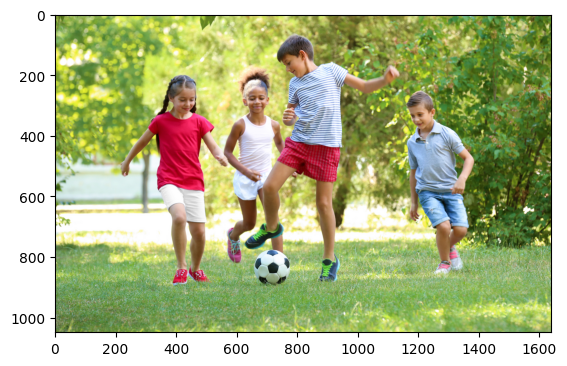

In [80]:
img_path = '3556576755.jpg'
image = Image.open(img_path)
xception_model = Xception(include_top=False, pooling="avg")
image = image.resize((299,299))
image = np.expand_dims(image, axis=0)
image = image/127.5
image = image - 1.0
feature = xception_model.predict(image)
photo = feature.copy()
Max_length = 32
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_5.h5')
img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, Max_length)
print("Output")
print(description)
plt.imshow(img)